# Categorical Encoding

### Handling Missing Values

In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv("titanic-train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_data, test_data = train_test_split(titanic_data, test_size=0.3, random_state=42)

In [7]:
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

In [8]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [9]:
most_frequent_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_frequent_embarked, inplace=True)
test_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

### Categorical Encoding

1. Label Encoding
   
![Alt text](image.png)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
train_data['Sex']

445      male
650      male
172    female
450      male
314      male
        ...  
106    female
270      male
860      male
435    female
102      male
Name: Sex, Length: 623, dtype: object

In [13]:
train_data['Sex'] = label_encoder.fit_transform(train_data[['Sex']])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [15]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,28.0,1,1,2661,15.2458,Unknown,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,Unknown,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.0,0,0,SOTON/O2 3101287,7.9250,Unknown,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,6.0,0,1,248727,33.0000,Unknown,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.0,1,0,2651,11.2417,Unknown,C
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,1,3,"Lulic, Mr. Nikola",1,27.0,0,0,315098,8.6625,Unknown,S
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0000,Unknown,S
456,457,0,1,"Millet, Mr. Francis Davis",1,65.0,0,0,13509,26.5500,E38,S
500,501,0,3,"Calic, Mr. Petar",1,17.0,0,0,315086,8.6625,Unknown,S


Pros:
  - Simple to implement.
  - Does not increase the dimensionality of the dataset.
  
Cons:
  - The ordinal nature (i.e., order) that is introduced might not be suitable for all types of algorithms, especially linear models.

2. One-Hot Encoding

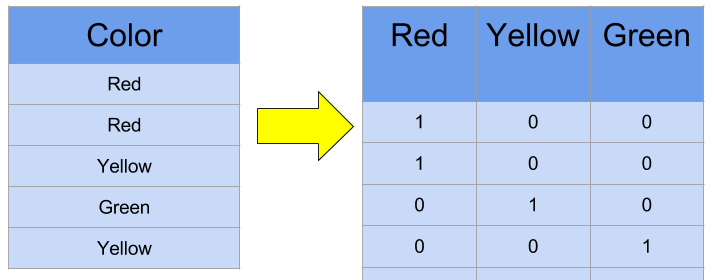

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [18]:
train_data[['Embarked']].value_counts()

Embarked
S           458
C           110
Q            55
dtype: int64

In [19]:
one_hot_train = one_hot_encoder.fit_transform(train_data[['Embarked']])

In [20]:
one_hot_train_df = pd.DataFrame(one_hot_train, columns = one_hot_encoder.get_feature_names_out(['Embarked']), index=train_data.index)

In [21]:
train_data = pd.concat([train_data, one_hot_train_df], axis=1)

In [22]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,0.0,0.0,1.0
650,651,0,3,"Mitkoff, Mr. Mito",1,28.0,0,0,349221,7.8958,Unknown,S,0.0,0.0,1.0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.1333,Unknown,S,0.0,0.0,1.0
450,451,0,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.7500,Unknown,S,0.0,0.0,1.0
314,315,0,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.2500,Unknown,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,Unknown,S,0.0,0.0,1.0
270,271,0,1,"Cairns, Mr. Alexander",1,28.0,0,0,113798,31.0000,Unknown,S,0.0,0.0,1.0
860,861,0,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,Unknown,S,0.0,0.0,1.0
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.0,1,2,113760,120.0000,B96 B98,S,0.0,0.0,1.0


In [23]:
one_hot_test = one_hot_encoder.transform(test_data[['Embarked']])
one_hot_test_df = pd.DataFrame(one_hot_test, columns = one_hot_encoder.get_feature_names_out(['Embarked']), index=test_data.index)
test_data = pd.concat([test_data, one_hot_test_df], axis=1)

In [24]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,28.0,1,1,2661,15.2458,Unknown,C,1.0,0.0,0.0
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,Unknown,S,0.0,0.0,1.0
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.0,0,0,SOTON/O2 3101287,7.9250,Unknown,S,0.0,0.0,1.0
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,6.0,0,1,248727,33.0000,Unknown,S,0.0,0.0,1.0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.0,1,0,2651,11.2417,Unknown,C,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,1,3,"Lulic, Mr. Nikola",1,27.0,0,0,315098,8.6625,Unknown,S,0.0,0.0,1.0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0000,Unknown,S,0.0,0.0,1.0
456,457,0,1,"Millet, Mr. Francis Davis",1,65.0,0,0,13509,26.5500,E38,S,0.0,0.0,1.0
500,501,0,3,"Calic, Mr. Petar",1,17.0,0,0,315086,8.6625,Unknown,S,0.0,0.0,1.0


Pros:
- Creates binary columns, which can be suitable for many types of algorithms.
- Does not introduce ordinal relationships between categories.

Cons:
- Can significantly increase the dimensionality of the dataset, especially if the categorical variable has many categories.

3. Ordinal Encoding

"low": 0, "medium": 1, "high": 2

In [25]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train_data['Embarked_ordinal'] = train_data['Embarked'].map(embarked_mapping)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,0.0,0.0,1.0,0
650,651,0,3,"Mitkoff, Mr. Mito",1,28.0,0,0,349221,7.8958,Unknown,S,0.0,0.0,1.0,0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.1333,Unknown,S,0.0,0.0,1.0,0
450,451,0,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.7500,Unknown,S,0.0,0.0,1.0,0
314,315,0,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.2500,Unknown,S,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,Unknown,S,0.0,0.0,1.0,0
270,271,0,1,"Cairns, Mr. Alexander",1,28.0,0,0,113798,31.0000,Unknown,S,0.0,0.0,1.0,0
860,861,0,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,Unknown,S,0.0,0.0,1.0,0
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.0,1,2,113760,120.0000,B96 B98,S,0.0,0.0,1.0,0


In [26]:
test_data['Embarked_ordinal'] = test_data['Embarked'].map(embarked_mapping)
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,28.0,1,1,2661,15.2458,Unknown,C,1.0,0.0,0.0,1
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,Unknown,S,0.0,0.0,1.0,0
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.0,0,0,SOTON/O2 3101287,7.9250,Unknown,S,0.0,0.0,1.0,0
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,6.0,0,1,248727,33.0000,Unknown,S,0.0,0.0,1.0,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.0,1,0,2651,11.2417,Unknown,C,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,1,3,"Lulic, Mr. Nikola",1,27.0,0,0,315098,8.6625,Unknown,S,0.0,0.0,1.0,0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0000,Unknown,S,0.0,0.0,1.0,0
456,457,0,1,"Millet, Mr. Francis Davis",1,65.0,0,0,13509,26.5500,E38,S,0.0,0.0,1.0,0
500,501,0,3,"Calic, Mr. Petar",1,17.0,0,0,315086,8.6625,Unknown,S,0.0,0.0,1.0,0


Pros:
-  It doesn't add new columns to the dataset.
-  Preserves the order.
-  Simple

Cons:
- Different categories might be mapped to the same integer, especially when manually defining mappings.
- Introduces ordinality Where None Exists if applied to nominal variables.

4. Count Encoding

Brand Name ------ Sold?

apple             1

samsung           1

apple             0

apple             1



apple: 3
samsung: 1

In [29]:
embarked_frequency = train_data['Embarked'].value_counts().to_dict()
embarked_frequency

{'S': 458, 'C': 110, 'Q': 55}

In [31]:
train_data['Embarked_count'] = train_data['Embarked'].map(embarked_frequency)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal,Embarked_count
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,0.0,0.0,1.0,0,458
650,651,0,3,"Mitkoff, Mr. Mito",1,28.0,0,0,349221,7.8958,Unknown,S,0.0,0.0,1.0,0,458
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.1333,Unknown,S,0.0,0.0,1.0,0,458
450,451,0,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.7500,Unknown,S,0.0,0.0,1.0,0,458
314,315,0,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.2500,Unknown,S,0.0,0.0,1.0,0,458


In [32]:
test_data['Embarked_count'] = test_data['Embarked'].map(embarked_frequency)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal,Embarked_count
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,28.0,1,1,2661,15.2458,Unknown,C,1.0,0.0,0.0,1,110
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,Unknown,S,0.0,0.0,1.0,0,458
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.0,0,0,SOTON/O2 3101287,7.9250,Unknown,S,0.0,0.0,1.0,0,458
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,6.0,0,1,248727,33.0000,Unknown,S,0.0,0.0,1.0,0,458
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.0,1,0,2651,11.2417,Unknown,C,1.0,0.0,0.0,1,110


5. Mean (Target) Encoding

In [39]:
embarked_target_encoding = train_data.groupby('Embarked')['Survived'].mean().to_dict()
embarked_target_encoding

{'C': 0.5636363636363636, 'Q': 0.38181818181818183, 'S': 0.3231441048034934}

In [40]:
train_data['Embarked_target_encoding'] = train_data['Embarked'].map(embarked_target_encoding)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal,Embarked_count,Embarked_target_encoding
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,0.0,0.0,1.0,0,458,0.323144
650,651,0,3,"Mitkoff, Mr. Mito",1,28.0,0,0,349221,7.8958,Unknown,S,0.0,0.0,1.0,0,458,0.323144
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.1333,Unknown,S,0.0,0.0,1.0,0,458,0.323144
450,451,0,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.7500,Unknown,S,0.0,0.0,1.0,0,458,0.323144
314,315,0,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.2500,Unknown,S,0.0,0.0,1.0,0,458,0.323144


In [41]:
test_data['Embarked_target_encoding'] = test_data['Embarked'].map(embarked_target_encoding)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_ordinal,Embarked_count,Embarked_target_encoding
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,28.0,1,1,2661,15.2458,Unknown,C,1.0,0.0,0.0,1,110,0.563636
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,C.A. 18723,10.5000,Unknown,S,0.0,0.0,1.0,0,458,0.323144
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.0,0,0,SOTON/O2 3101287,7.9250,Unknown,S,0.0,0.0,1.0,0,458,0.323144
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,6.0,0,1,248727,33.0000,Unknown,S,0.0,0.0,1.0,0,458,0.323144
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.0,1,0,2651,11.2417,Unknown,C,1.0,0.0,0.0,1,110,0.563636


In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [43]:
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_data, test_data = train_test_split(titanic_data, test_size=0.3, random_state=42)
X = train_data.drop('Survived', axis='columns')
y = train_data['Survived']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [52]:
scores = []
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

for train_index, val_index in strat_kfold.split(X, y):
  X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
  y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
  
  X_train_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
  X_val_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
  
  X_train_fold['Cabin'].fillna('Unknown', inplace=True)
  X_val_fold['Cabin'].fillna('Unknown', inplace=True)
  
  most_frequent_embarked_fold = X_train_fold['Embarked'].mode()[0]
  X_train_fold['Embarked'].fillna(most_frequent_embarked_fold, inplace=True)
  X_val_fold['Embarked'].fillna(most_frequent_embarked_fold, inplace=True)
  
  # X_train_fold = X_train_fold[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Cabin']]
  # X_val_fold = X_val_fold[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Cabin']]
  
  sex_encoded_train = onehot_encoder.fit_transform(X_train_fold[['Sex']])
  sex_encoded_val = onehot_encoder.transform(X_val_fold[['Sex']])
    
  temp_df = X_train_fold.copy()
  temp_df['Survived'] = y_train_fold  
  embarked_mean_encoding = temp_df.groupby('Embarked')['Survived'].mean().to_dict()
  embarked_encoded_train = X_train_fold['Embarked'].map(embarked_mean_encoding)
  embarked_encoded_val = X_val_fold['Embarked'].map(embarked_mean_encoding)
  del temp_df
  
  label_encoder.fit(pd.concat([X_train_fold['Cabin'], X_val_fold['Cabin']]))
  cabin_encoded_train = label_encoder.transform(X_train_fold['Cabin'])
  cabin_encoded_val = label_encoder.transform(X_val_fold['Cabin'])
  
  columns = ['Sex_encoded_' + str(i) for i in range(sex_encoded_train.shape[1])]
  
  
  
  X_train_fold = X_train_fold[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
  # X_train_fold['Sex_encoded'] = sex_encoded_train
  X_train_fold['Embarked_encoded'] = embarked_encoded_train
  X_train_fold['Cabin_encoded'] = cabin_encoded_train
  
  X_val_fold = X_val_fold[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
  # X_val_fold['Sex_encoded'] = sex_encoded_val
  X_val_fold['Embarked_encoded'] = embarked_encoded_val
  X_val_fold['Cabin_encoded'] = cabin_encoded_val
  
  for i, col in enumerate(columns):
    X_train_fold[col] = sex_encoded_train[:, i]
    X_val_fold[col] = sex_encoded_val[:, i]
    
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train_fold, y_train_fold)
  
  y_pred = model.predict(X_val_fold)
  
  accuracy = accuracy_score(y_val_fold, y_pred)
  
  scores.append(accuracy)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_fold['Age'].fillna(X_train_fold['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\3326871226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [53]:
scores

[0.792, 0.872, 0.808, 0.7903225806451613, 0.7258064516129032]

In [54]:
average_accuracy = np.mean(scores)
average_accuracy

0.7976258064516129